### Introduction
Cohort analysis is a useful technique that facilitates businesses in tracking customer retention over time. A cohort refers to a group of customers who share similar characteristics, such as the month they made their first purchase or the region they live in. By analyzing the retention rate of each cohort, businesses can identify trends and patterns in customer behavior and take action to improve customer retention.

#### Methodology
- Data Cleaning
- Descriptive Statistics
- Cohort Analysis
- RFM Analysis
- K-Means Clustering
- Conclusion

### The Dataset

#### Description
Transactional data that lists all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail that mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#### Data Overview
- **File(s):** Online Retail.xlsx
- **Table(s):** Online Retail
- **Variables in the table:** InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country

#### Attribute Overview
- **InvoiceNo:** A unique 6-digit number assigned to each transaction. If the number starts with the letter 'c', it indicates cancellation
- **StockCode:** A unique 5-digit code assigned to each product
- **Description:** The name of the product
- **Quantity:** The quantity of each product per transaction
- **InvoiceDate:** The date and time when the transaction was generated
- **UnitPrice:** Product price per unit in sterling
- **CustomerID:** A unique 5-digit number assigned to each customer
- **Country:** The name of the country where the customer resides

#### Importing Python libraries and Loading the dataset

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Online Retail.csv')

#### Displaying the first 5 observations

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


#### Displaying the last 5 observations

In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


#### Displaying the number of observations(rows) and variables(columns)

In [4]:
df.shape

(541909, 8)

#### Displaying the attributes and their data types

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data within a dataset. If data is incorrect, outcomes and algorithms become unreliable, even though they may be implemented correctly because of this it becomes crucial to perform data cleaning

The most common data cleaning practices include:

<ul style="list-style-type:square">
    <li>Removing duplicate or irrelevant observations</li>
    <li>Fixing structural errors such as strange naming conventions, typos or incorrect capitalization</li>
    <li>Filtering unwanted outliers (if needed)</li>
    <li>Handling missing data</li>
</ul>

- Count of non-missing values for each variable

In [6]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

- Detecting missing values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Removing missing values

In [8]:
df.dropna(inplace=True)

- Detecting redundant data

In [9]:
df.duplicated().sum()

5225

- Removing redundant data

In [10]:
df = df.drop_duplicates()

### Descriptive statistics

Descriptive statistics summarizes a given data set, which can be either a representation of the entire population or a sample of the population. Descriptive statistics can be broken down into measures of central tendency and measures of variability/ spread. Measures of central tendency include mean, median and mode whereas measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis and skewness

- **count:** Count of non-empty values
- **mean:** The mean(average) value
- **std:** Standard deviation
- **min:** Minimum value
- **25%:** The 25% percentile value
- **50%:** The 50% percentile value
- **75%:** The 75% percentile value
- **max:** Maximum value

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# The 'min' value for Quantity is negative and that of UnitPrice is 0 which is not desired

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


#### Summarizing the dataframe

A short summary of the dataframe which consists of information such as RangeIndex, Data columns, dtypes and memory usage

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


#### Variance Analysis

Variance is the expected value of the squared variation of a random variable from its mean. In other words, variance estimates how far the data points are spread out from their mean

In [14]:
df.var(numeric_only=True)

Quantity      3.257766e+04
UnitPrice     4.946993e+02
CustomerID    2.936218e+06
dtype: float64

#### Standard Deviation Analysis

Standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean

In [15]:
df.std(numeric_only=True)

Quantity       180.492832
UnitPrice       22.241836
CustomerID    1713.539549
dtype: float64

From the analysis of Variance and Standard Deviation it can be concluded that:

<ul style="list-style-type:square">
    <li>The attributes Quantity and UnitPrice are quite spread out, away from the mean and from one another becuase of the vast difference that these two attributes have in terms of value</li>
    <li>The attribute CustomerID is unique for each customer because of which it has the highest variance and standard deviation</li>
</ul>

### Cohort Analysis

As the initial step of Cohort Analysis we identify the characteristics that can be used to define the cohort. Based on the attributes of the dataset it would be a good idea to define the cohort as the year and month in which a customer made his/ her first purchase. Based on this grouping we can identify the cohort index as the number of months that have passed since the first purchase was made. This index can then be utilized to identify the active customers from each cohort which determines the retention rate

- Converting InvoiceDate to datetime

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [17]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

- Defining the cohort

In [18]:
def extract_data(x): 
    return dt.datetime(x.year, x.month, 1)


df['InvoicePeriod'] = df['InvoiceDate'].apply(extract_data)
grouping = df.groupby('CustomerID')['InvoicePeriod']
df['CohortPeriod'] = grouping.transform('min')

In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortPeriod
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


- Defining the cohort index

In [20]:
# The cohort index represents the number of months that have passed since the first purchase


def extract_year_and_month(column):
    year = df[column].dt.year
    month = df[column].dt.month

    return year, month


invoice_year, invoice_month = extract_year_and_month('InvoicePeriod')
cohort_year, cohort_month = extract_year_and_month('CohortPeriod')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortPeriod,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


- Determining the number of active customers based on the cohort index

In [22]:
grouping = df.groupby(['CohortPeriod', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_count = cohort_data.pivot(index='CohortPeriod', columns='CohortIndex', values='CustomerID')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortPeriod,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Determining the retention rate of each cohort

In [23]:
cohort_size = cohort_count.iloc[:, 0]
retention = cohort_count.divide(cohort_size, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortPeriod,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortPeriod'>

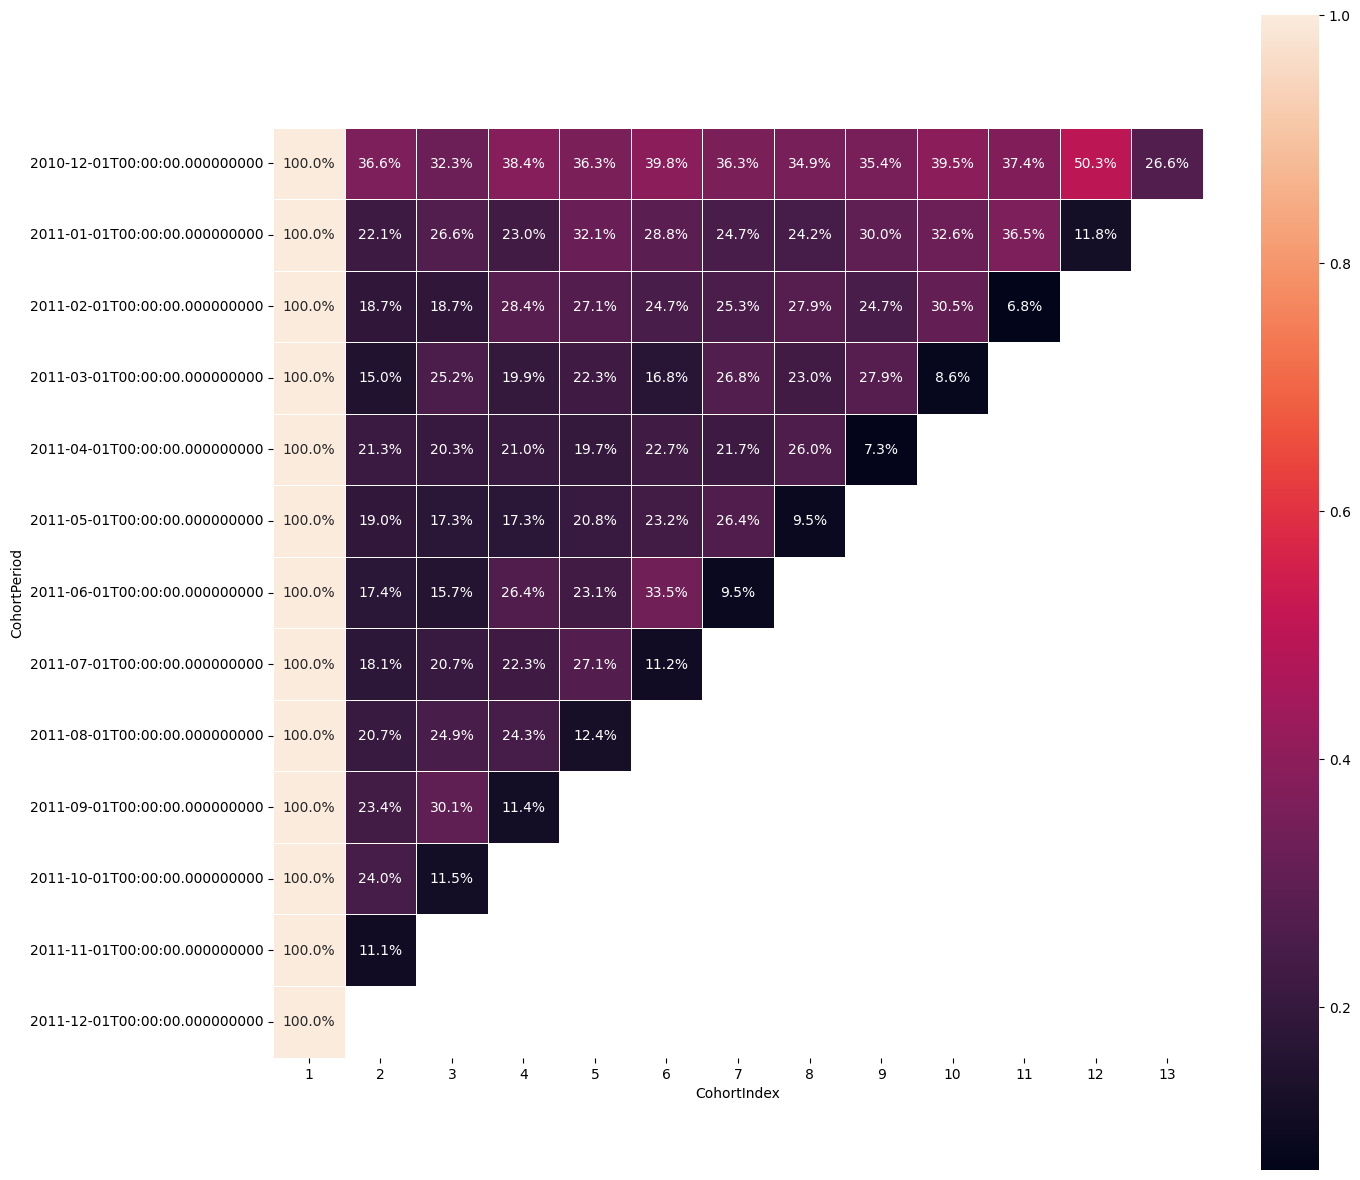

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(retention, annot=True, fmt='.1%', linewidth=0.5, square=True, ax=ax)

### RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their transactions

<ul style="list-style-type:square">
    <li><b>Recency:</b> How recent was the customer's last purchase? Customers who recently made a purchase are more likely to purchase or use the product again. Recency is often measured in days but, depending on the product can also be measured in years, weeks or even hours</li>
    <li><b>Frequency:</b> How often does the customer make a purchase in a given time frame? Customers who purchased once are are more likely to purchase again</li>
    <li><b>Monetary:</b> How much money did the customer spend in a given time frame? Customers who spend more money are more likely to spend money in the future and thus are more valuable for business</li>
</ul>

- Calculating money spent by the customer

In [25]:
df['MoneySpent'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortPeriod,CohortIndex,MoneySpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


- Determining the next date when the purchase will be made

In [26]:
latest_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
latest_date

Timestamp('2011-12-10 12:50:00')

- Computing RFM Metrics

In [27]:
rfm = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'MoneySpent': 'sum'})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'MoneySpent': 'Monetary'}, 
    inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


- Determining RFM Score

In [29]:
# Customers who have been more active recently will be given a higher 'R' score as compared to other customers
# Customers that shop frequently and that have higher transactional power will be given a higher 'F' and 'M' score respectively

r_label = range(4, 0, -1)
f_label = range(1, 5)
m_label = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_label)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_label)
m_quartiles = pd.qcut(rfm['Monetary'], q=4, labels=m_label)

rfm = rfm.assign(R_Score=r_quartiles, F_Score=f_quartiles, M_Score=m_quartiles)


def add_rfm(x): 
    return str(x['R_Score']) + str(x['F_Score']) + str(x['M_Score'])


rfm['RFM_Segment'] = rfm.apply(add_rfm, axis=1)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


- Analyzing RFM Segments

In [30]:
# RFM Segment represents the combination of the 'R', 'F' and 'M' score

rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[: 5]

RFM_Segment
444    450
111    381
344    217
122    206
211    179
dtype: int64

- Analyzing the RFM Segment: 111

In [31]:
rfm[rfm['RFM_Segment'] == '111'].head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12353.0,204,4,89.00,1,1,1,111,3
12361.0,287,10,189.90,1,1,1,111,3
12401.0,303,5,84.30,1,1,1,111,3
12402.0,323,11,225.60,1,1,1,111,3
12441.0,367,11,173.55,1,1,1,111,3


- Analyzing the RFM Segment: 444

In [32]:
rfm[rfm['RFM_Segment'] == '444'].head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12
12362.0,3,266,5226.23,4,4,4,444,12
12388.0,16,100,2780.66,4,4,4,444,12
12417.0,3,192,3649.10,4,4,4,444,12
12423.0,1,125,1859.31,4,4,4,444,12


- Metrics of each RFM Score

In [33]:
rfm.groupby('RFM_Score').agg({
    'Recency': 'mean', 
    'Frequency': 'mean', 
    'Monetary': ['mean', 'count']}).round(3)

Recency Frequency  Monetary      
              mean      mean      mean count
RFM_Score                                   
3          260.732     8.199   157.415   381
4          177.211    13.598   239.995   388
5          152.934    21.203   366.602   518
6           95.926    27.882   820.813   457
7           79.555    37.972   758.110   463
8           64.057    56.024   987.322   454
9           45.949    78.729  1795.099   414
10          32.420   110.542  2056.435   426
11          21.339   186.933  4062.007   387
12           7.244   367.829  9285.881   450

### K-Means Clustering

K-Means Clustering segregates the data points into groups known as clusters. The data is grouped into clusters based on the similarity between the multivariate features. This allows us to understand the data distribution based on the available features and also provides a convenient way to discover categories of groups in unlabeled datasets. It is a centroid-based algorithm, where each cluster is associated with a centroid

The algorithm mainly performs two tasks:

<ul style="list-style-type:square">
    <li>Determines the best value for 'K' center points or centroids by an iterative process</li>
    <li>Assigns each data point to its closest K-center. Those data points which are near to the particular K-center, create a cluster</li>
</ul>

Hence each cluster has datapoints with some commonalities, and is away from other clusters. The performance of the K-Means clustering depends highly upon the clusters that it forms. So finding the optimal number of clusters is a huge task. There are many different methods to find the optimal number of clusters the most appropriate of which is the Elbow Plot or the Elbow Method

- Elbow Plot or Elbow Method

The Elbow Plot or the Elbow Method executes K-means clustering on the dataset for different values of 'K' which range from 1 to 10 and for each value of 'K' it calculates the SSE value. By plotting a curve between the SSE values and the number of clusters 'K' the sharp point of bend or if there is a point in the plot which makes the plot look like an arm, then that point is considered as the best value of 'K'. Since the graph shows the sharp bend, which looks like an elbow, hence it is known as the elbow plot and the method is termed as the elbow method

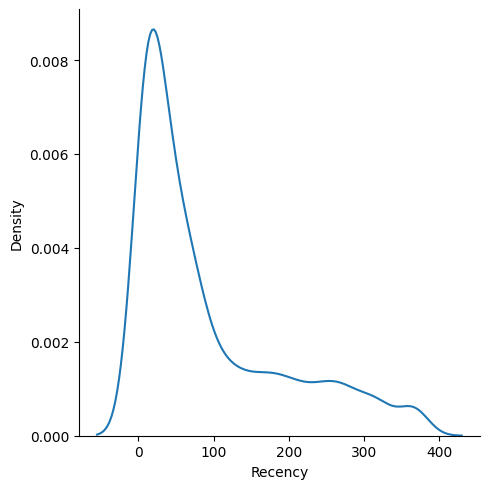

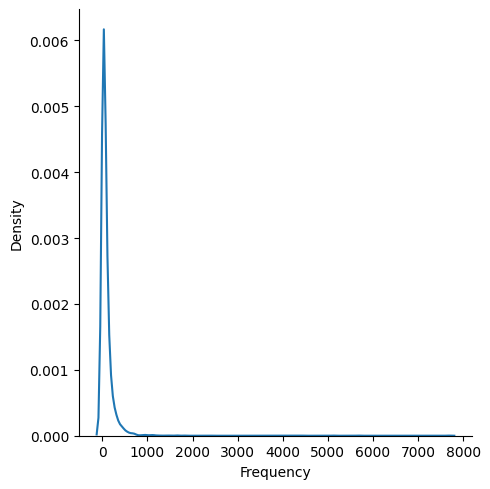

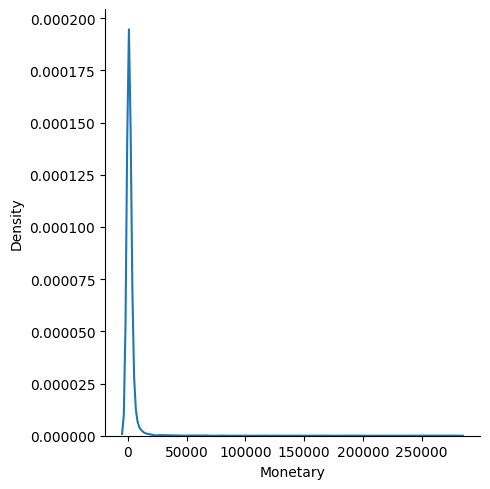

In [34]:
sns.displot(rfm.Recency, kind='kde', label='Recency')
sns.displot(rfm.Frequency, kind='kde', label='Frequency')
sns.displot(rfm.Monetary, kind='kde', label='Monetary Value')

From the above graphs we can conclude that the data is skewed which means that the distribution of values is not symmetric hence, we must use logarithmic transformation to unskew the data before proceeding with K-Means Clustering

- Unskewing the data through logarithmic transformation

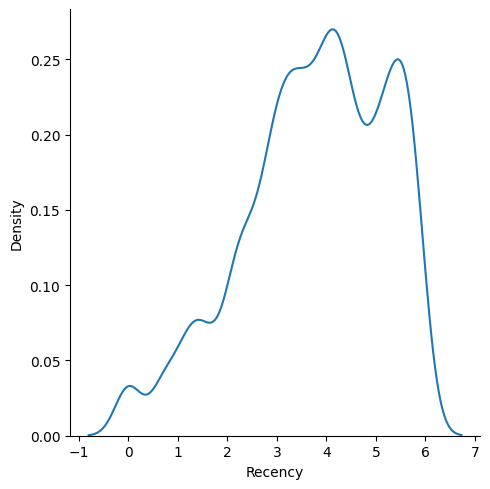

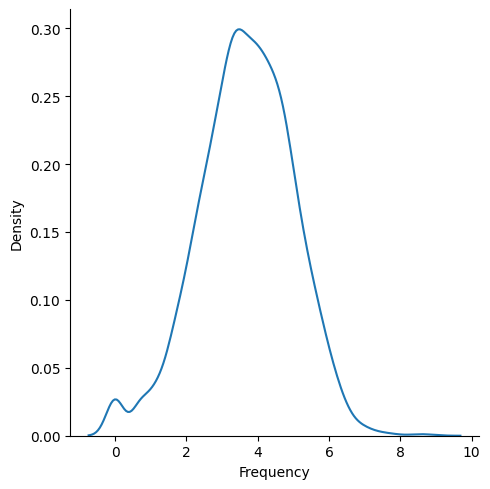

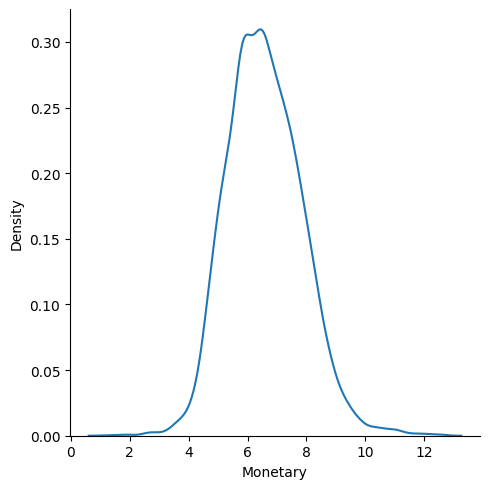

In [35]:
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

sns.displot(rfm_log.Recency, kind='kde', label='Recency')
sns.displot(rfm_log.Frequency, kind='kde', label='Frequency')
sns.displot(rfm_log.Monetary, kind='kde', label='Monetary Value')

In [36]:
# Normalizing the variables

scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized = scaler.transform(rfm_log)

- Elbow plot

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

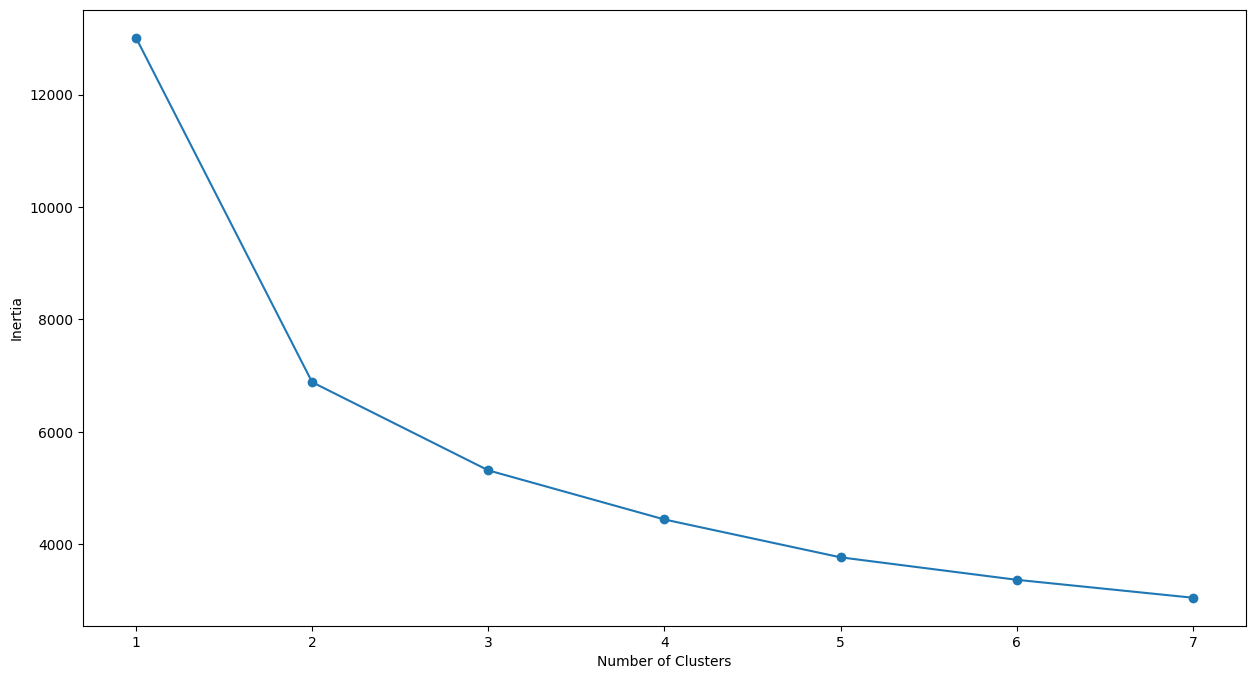

In [37]:
ks = range(1, 8)
inertias = []


for k in ks :
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)


f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The elbow plot helps in defining a fixed number of clusters that are being formed in the data based on which K-Means Clustering can be carried out. For this dataset that number is 3 as we can clearly see from the Angle Plot that the deviation decreases and reduces to a minimum after 3 clusters

In [38]:
# Clustering

kc = KMeans(n_clusters=3, random_state=1)
kc.fit(rfm_normalized)

cluster_labels = kc.labels_
rfm_k3 = rfm[['Recency','Frequency','Monetary']].assign(K_Cluster=cluster_labels)

# Calculating average RFM value and size of each cluster
rfm_k3.groupby('K_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
}).round(3)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recency Frequency  Monetary      
              mean      mean      mean count
K_Cluster                                   
0          171.199    14.907   293.335  1523
1           68.942    65.358  1167.397  1859
2           13.099   259.926  6558.858   956

- Importance of Clustering

<Axes: ylabel='K_Cluster'>

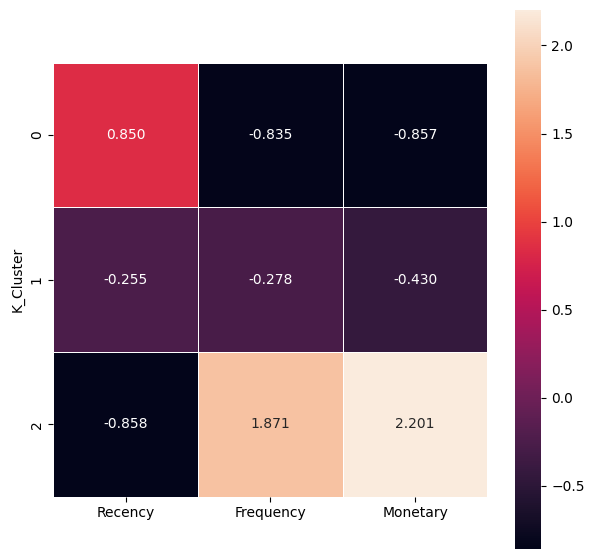

In [39]:
# We can compare the variance between the groups by calculating the proportional gap with the total mean 
# The further the ratio is from 0, the more important that attribute is relative to the total population

cluster_avg = rfm_k3.groupby(['K_Cluster']).mean()
population_avg = rfm[['Recency', 'Frequency', 'Monetary']].mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(3)

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(relative_imp, annot=True, fmt='.3f', linewidth=0.5, square=True, ax=ax)

### Conclusion

The customer purchase data has been analyzed using RFM and K-Means Clustering. The obtained results can be utilized to identify the most profitable customer groups. This information helps us determine which customers to focus on and what type of special offers and promotions should be provided in the future to foster customer loyalty